In [70]:
# Importar bibliotecas necesarias
using DataFrames
using XLSX
using StatsBase
using Plots
#using StatsPlots

# Cargar el archivo
file_path = "DATA/Calcofi/bottle.csv" #Ruta al archivo a procesar
#data = XLSX.readtable(file_path, "Hoja1")  # Cambiar "Hoja1" al nombre real de la hoja si es necesario
data = DataFrame(CSV.File(file_path; normalizenames=true, stringtype=String)) #Carga del archivo

# Convertir a DataFrame
df = DataFrame(data)
println("Datos cargados correctamente.")

Datos cargados correctamente.


In [71]:
# Mostrar dimensiones del DataFrame
println("Dimensiones de los datos:")
println(size(df))

Dimensiones de los datos:
(864863, 74)


In [72]:
using DataFrames

# Supongamos que 'df' es tu DataFrame cargado
println("Tipos de datos de las columnas:")
for col in names(df)
    println("$col: $(eltype(df[!, col]))")
end

Tipos de datos de las columnas:
Cst_Cnt: Int64
Btl_Cnt: Int64
Sta_ID: String
Depth_ID: String
Depthm: Int64
T_degC: Union{Missing, Float64}
Salnty: Union{Missing, Float64}
O2ml_L: Union{Missing, Float64}
STheta: Union{Missing, Float64}
O2Sat: Union{Missing, Float64}
Oxy_µmol_Kg: Union{Missing, Float64}
BtlNum: Union{Missing, Int64}
RecInd: Int64
T_prec: Union{Missing, Int64}
T_qual: Union{Missing, Int64}
S_prec: Union{Missing, Int64}
S_qual: Union{Missing, Int64}
P_qual: Union{Missing, Int64}
O_qual: Union{Missing, Int64}
SThtaq: Union{Missing, Int64}
O2Satq: Union{Missing, Int64}
ChlorA: Union{Missing, Float64}
Chlqua: Union{Missing, Int64}
Phaeop: Union{Missing, Float64}
Phaqua: Union{Missing, Int64}
PO4uM: Union{Missing, Float64}
PO4q: Union{Missing, Int64}
SiO3uM: Union{Missing, Float64}
SiO3qu: Union{Missing, Int64}
NO2uM: Union{Missing, Float64}
NO2q: Union{Missing, Int64}
NO3uM: Union{Missing, Float64}
NO3q: Union{Missing, Int64}
NH3uM: Union{Missing, Float64}
NH3q: Union{Missin

In [73]:
using DataFrames
# Esta parte se ejecuta al tomar una muestra y leerla en Excel porque me lee el tipo de datos como "Any"

#=
# Función para convertir columnas a Float64
function convert_columns_to_float!(df::DataFrame)
    for col in names(df)
        try
            # Intentar convertir cada columna a Float64
            df[!, col] = parse.(Float64, df[!, col])
        catch
            # Si falla (por valores no numéricos), intentar reemplazar no numéricos por missing y luego convertir
            df[!, col] = replace.(df[!, col], x -> (try parse(Float64, x) catch missing end))
            df[!, col] = convert(Vector{Union{Missing, Float64}}, df[!, col])
        end
    end
end

# Ejecutar la función
convert_columns_to_float!(df)
=#

# Verificar los tipos después de la conversión
println("Tipos de datos después de la conversión:")
for col in names(df)
    println("$col: $(eltype(df[!, col]))")
end


Tipos de datos después de la conversión:
Cst_Cnt: Int64
Btl_Cnt: Int64
Sta_ID: String
Depth_ID: String
Depthm: Int64
T_degC: Union{Missing, Float64}
Salnty: Union{Missing, Float64}
O2ml_L: Union{Missing, Float64}
STheta: Union{Missing, Float64}
O2Sat: Union{Missing, Float64}
Oxy_µmol_Kg: Union{Missing, Float64}
BtlNum: Union{Missing, Int64}
RecInd: Int64
T_prec: Union{Missing, Int64}
T_qual: Union{Missing, Int64}
S_prec: Union{Missing, Int64}
S_qual: Union{Missing, Int64}
P_qual: Union{Missing, Int64}
O_qual: Union{Missing, Int64}
SThtaq: Union{Missing, Int64}
O2Satq: Union{Missing, Int64}
ChlorA: Union{Missing, Float64}
Chlqua: Union{Missing, Int64}
Phaeop: Union{Missing, Float64}
Phaqua: Union{Missing, Int64}
PO4uM: Union{Missing, Float64}
PO4q: Union{Missing, Int64}
SiO3uM: Union{Missing, Float64}
SiO3qu: Union{Missing, Int64}
NO2uM: Union{Missing, Float64}
NO2q: Union{Missing, Int64}
NO3uM: Union{Missing, Float64}
NO3q: Union{Missing, Int64}
NH3uM: Union{Missing, Float64}
NH3q: Uni

In [75]:
function count_missing(df, col)
    return sum(ismissing.(df[!, col]))
end

println("Datos faltantes por columna:")
for col in names(df)
    println("$col: ", count_missing(df, col))
end

Datos faltantes por columna:
Cst_Cnt: 0
Btl_Cnt: 0
Sta_ID: 0
Depth_ID: 0
Depthm: 0
T_degC: 10963
Salnty: 47354
O2ml_L: 168662
STheta: 52689
O2Sat: 203589
Oxy_µmol_Kg: 203595
BtlNum: 746196
RecInd: 0
T_prec: 10963
T_qual: 841736
S_prec: 47354
S_qual: 789949
P_qual: 191108
O_qual: 680187
SThtaq: 799040
O2Satq: 647066
ChlorA: 639591
Chlqua: 225697
Phaeop: 639592
Phaqua: 225693
PO4uM: 451546
PO4q: 413077
SiO3uM: 510772
SiO3qu: 353997
NO2uM: 527287
NO2q: 335389
NO3uM: 527460
NO3q: 334930
NH3uM: 799901
NH3q: 56564
C14As1: 850431
C14A1p: 852103
C14A1q: 16258
C14As2: 850449
C14A2p: 852121
C14A2q: 16240
DarkAs: 842214
DarkAp: 844406
DarkAq: 24423
MeanAs: 842213
MeanAp: 844406
MeanAq: 24424
IncTim: 850426
LightP: 846212
R_Depth: 0
R_TEMP: 10963
R_POTEMP: 46047
R_SALINITY: 47354
R_SIGMA: 52856
R_SVA: 52771
R_DYNHT: 46657
R_O2: 168662
R_O2Sat: 198415
R_SIO3: 510764
R_PO4: 451538
R_NO3: 527452
R_NO2: 527279
R_NH4: 799881
R_CHLA: 639587
R_PHAEO: 639588
R_PRES: 0
R_SAMP: 742857
DIC1: 862864
DIC2: 864

In [76]:
function missing_percentage(df)
    n = nrow(df)
    for col in names(df)
        missing = count_missing(df, col)
        println("$col: ", (missing / n) * 100, "% faltantes")
    end
end

missing_percentage(df)

Cst_Cnt: 0.0% faltantes
Btl_Cnt: 0.0% faltantes
Sta_ID: 0.0% faltantes
Depth_ID: 0.0% faltantes
Depthm: 0.0% faltantes
T_degC: 1.2675996082616552% faltantes
Salnty: 5.475318056154559% faltantes
O2ml_L: 19.501585800294382% faltantes
STheta: 6.092178761260454% faltantes
O2Sat: 23.54002888318728% faltantes
Oxy_µmol_Kg: 23.54072263468318% faltantes
BtlNum: 86.27909853930622% faltantes
RecInd: 0.0% faltantes
T_prec: 1.2675996082616552% faltantes
T_qual: 97.32593485904704% faltantes
S_prec: 5.475318056154559% faltantes
S_qual: 91.33805007267047% faltantes
P_qual: 22.096910146462502% faltantes
O_qual: 78.64679145714408% faltantes
SThtaq: 92.3891992142108% faltantes
O2Satq: 74.81716757451758% faltantes
ChlorA: 73.95286883587343% faltantes
Chlqua: 26.096271895086275% faltantes
Phaeop: 73.95298446112274% faltantes
Phaqua: 26.095809394089002% faltantes
PO4uM: 52.210118828068715% faltantes
PO4q: 47.76213111209521% faltantes
SiO3uM: 59.058139844114045% faltantes
SiO3qu: 40.930991382450166% faltante

In [77]:
function delete_columns_by_threshold!(df, threshold)
    cols_to_remove = [col for col in names(df) if (count_missing(df, col) / nrow(df)) > threshold]
    select!(df, Not(cols_to_remove))
    println("Columnas eliminadas: ", cols_to_remove)
end

delete_columns_by_threshold!(df, 0.5)  # Ejemplo: eliminar columnas con más del 50% de datos faltantes


Columnas eliminadas: ["BtlNum", "T_qual", "S_qual", "O_qual", "SThtaq", "O2Satq", "ChlorA", "Phaeop", "PO4uM", "SiO3uM", "NO2uM", "NO3uM", "NH3uM", "C14As1", "C14A1p", "C14As2", "C14A2p", "DarkAs", "DarkAp", "MeanAs", "MeanAp", "IncTim", "LightP", "R_SIO3", "R_PO4", "R_NO3", "R_NO2", "R_NH4", "R_CHLA", "R_PHAEO", "R_SAMP", "DIC1", "DIC2", "TA1", "TA2", "pH2", "pH1", "DIC_Quality_Comment"]


In [85]:
function calculate_correlation(df)
    numeric_cols = names(df, eltype(Float64))
    cor_matrix = cor(Matrix(df[:, numeric_cols]))
    return cor_matrix
end

correlation_matrix = calculate_correlation(df)
println("Matriz de correlación calculada.")

Matriz de correlación calculada.


In [90]:
co_nk=cor(Matrix(df[:, numeric_cols]))

18×18 Matrix{Union{Missing, Float64}}:
  1.0        0.999345  -0.162222   …   missing  -0.16222    -0.161961
  0.999345   1.0       -0.161617       missing  -0.161614   -0.161348
 -0.162222  -0.161617   1.0            missing   1.0         0.999994
   missing    missing    missing       missing    missing     missing
 -0.100142  -0.100828   0.0823158      missing   0.0823171   0.0821835
   missing    missing    missing   …   missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing   …   missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing       missing    missing     missing
   missing    missing    missing       missing    

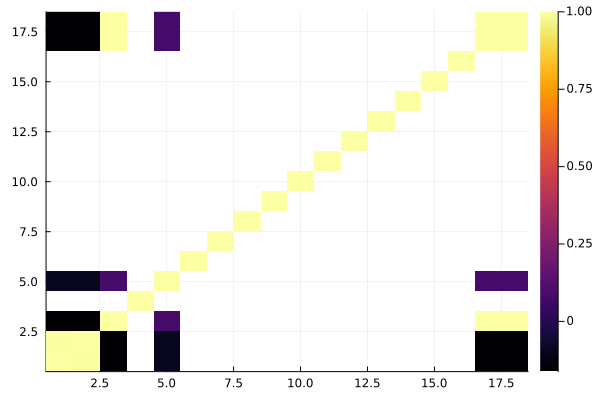

In [91]:
heatmap(co_nk)

In [92]:
function remove_outliers!(df, col)
    Q1 = quantile(df[!, col], 0.25)
    Q3 = quantile(df[!, col], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filter!(row -> (row[col] >= lower_bound) && (row[col] <= upper_bound), df)
end

for col in names(df, eltype(Float64))
    remove_outliers!(df, col)
end
println("Valores atípicos eliminados.")


Valores atípicos eliminados.
